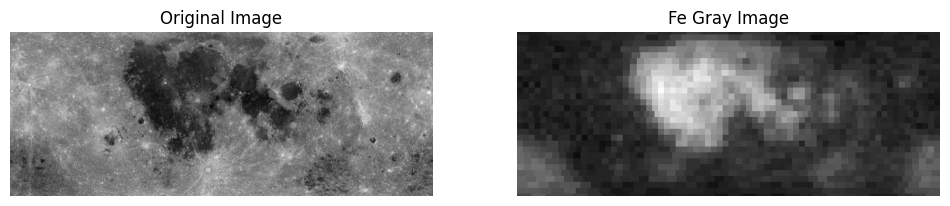

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original_img= cv2.imread('Req_moon.png', cv2.IMREAD_GRAYSCALE)
fe_gray = cv2.imread('Fe_grey.png', cv2.IMREAD_GRAYSCALE)

original_img = cv2.resize(original_img, (720, 280))
fe_gray = cv2.resize(fe_gray, (720, 280))

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(original_img, cmap='grey')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122) 
plt.imshow(fe_gray, cmap='grey')
plt.title('Fe Gray Image')
plt.axis('off')
plt.show()


/home/subarno/Desktop/isro/env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


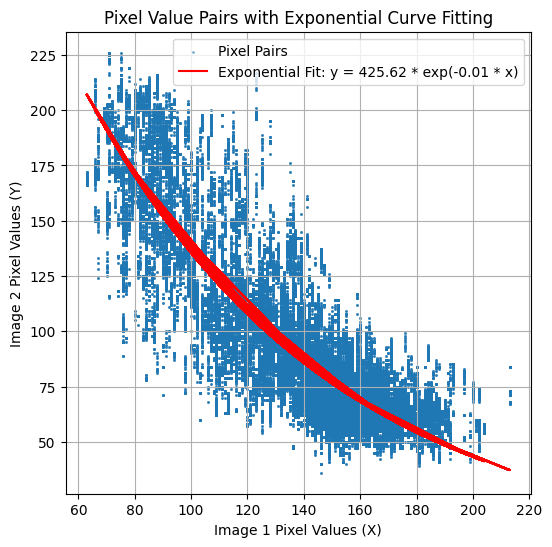

(np.float64(425.6207520644537), np.float64(-0.011441098155354875))

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import cv2

image1=cv2.imread('Low_moon.png')
image2=cv2.imread('Fe_grey.png')
pixels1 = image1.flatten()
pixels2 = image2.flatten()

pixel_pairs = list(zip(pixels1, pixels2))

x_vals, y_vals = zip(*pixel_pairs)

def exp_function(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exp_function, x_vals, y_vals, p0=[1, 0.01])  # Initial guess [a, b]

a, b = params

y_pred = exp_function(np.array(x_vals), a, b)

plt.figure(figsize=(6, 6))
plt.scatter(x_vals, y_vals, alpha=0.5, s=1, label='Pixel Pairs')
plt.plot(x_vals, y_pred, color='red', label=f'Exponential Fit: y = {a:.2f} * exp({b:.2f} * x)')
plt.title("Pixel Value Pairs with Exponential Curve Fitting")
plt.xlabel("Image 1 Pixel Values (X)")
plt.ylabel("Image 2 Pixel Values (Y)")
plt.grid(True)
plt.legend()
plt.show()

a, b

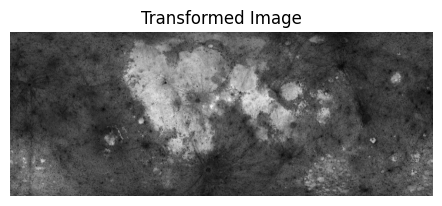

In [22]:
transformed_img = 425.62*np.exp(-0.01*original_img)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(transformed_img, cmap='grey')
plt.title('Transformed Image')
plt.axis('off')
plt.show()

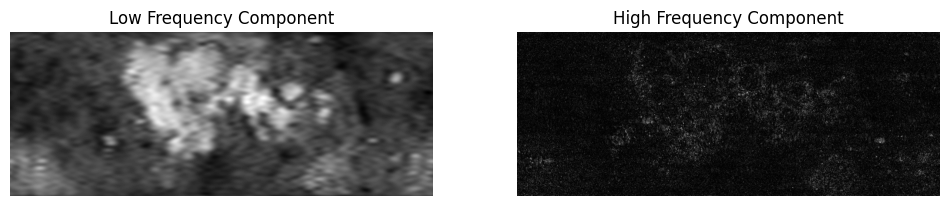

In [45]:
f_transform = np.fft.fft2(transformed_img)
f_shift = np.fft.fftshift(f_transform)

rows, cols = transformed_img.shape
crow, ccol = rows//2, cols//2
mask_low = np.zeros((rows,cols), np.uint8)
mask_high = np.ones((rows,cols), np.uint8)

r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (abs(x - center[0]) <= r) & (abs(y - center[1]) <= r)
mask_low[mask_area] = 1
mask_high[mask_area] = 0.2

f_low = f_shift * mask_low
f_high = f_shift * mask_high

low_freq = np.abs(np.fft.ifft2(np.fft.ifftshift(f_low)))
high_freq = np.abs(np.fft.ifft2(np.fft.ifftshift(f_high)))

low_freq = cv2.normalize(low_freq, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
high_freq = cv2.normalize(high_freq, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(low_freq, cmap='gray')
plt.title('Low Frequency Component')
plt.axis('off')

plt.subplot(122)
plt.imshow(high_freq, cmap='gray')
plt.title('High Frequency Component')
plt.axis('off')
plt.show()


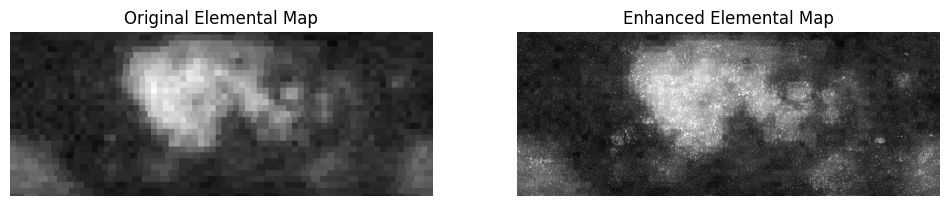

In [44]:

blurred_elemental = cv2.GaussianBlur(fe_gray, (7,7), 0)
enhanced_map = cv2.add(blurred_elemental, high_freq)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(fe_gray, cmap='gray')
plt.title('Original Elemental Map')
plt.axis('off')

plt.subplot(122)
plt.imshow(enhanced_map, cmap='gray')
plt.title('Enhanced Elemental Map')
plt.axis('off')
plt.show()
